In [1]:
import numpy as np
import pandas as pd


In [2]:
conn=pd.read_csv('/home/maria/Documents/Connectomics/exported-traced-adjacencies/traced-total-connections.csv')

In [3]:
print(conn)

         bodyId_pre  bodyId_post  weight
0        5813054846   5813020143       1
1        5813054846   2215550458       1
2        5813054846   1448575109       1
3        5813054846   1223388206       1
4        5813054846   1913403687       1
...             ...          ...     ...
3413155   453794660    481070027       1
3413156   453794660    423792440       2
3413157   453794660    455172836       1
3413158   453794660    388975834       3
3413159   453794660    767904550       1

[3413160 rows x 3 columns]


In [4]:
conn=np.array(conn)
print(conn.shape)
print(np.unique(conn[:,0]).shape)

(3413160, 3)
(21616,)


In [5]:
dat=pd.read_csv('/home/maria/Documents/Connectomics/exported-traced-adjacencies/traced-neurons.csv')
print(dat)
dat['instance'].values

           bodyId               instance          type
0      5813054846    PVM03y_pct(PVM03)_R    PVM03y_pct
1      1479492693    AVL13t_pct(AVL13)_R    AVL13t_pct
2      5812982999                    KCg           KCg
3      1720300275  AVL04v_d_pct(AVL04)_R  AVL04v_d_pct
4      5813060766  PDL14m_a_pct(PDL14)_R  PDL14m_a_pct
...           ...                    ...           ...
21658   583132200              (ADM01)_L           NaN
21659  5813098080   ADL01os_pct(ADL01)_R   ADL01os_pct
21660  1948478919    AVL14t_pct(AVL14)_R    AVL14t_pct
21661   604061479    AVL12j_pct(AVL12)_R    AVL12j_pct
21662   453794660  ADM04n_d_pct(ADM04)_R  ADM04n_d_pct

[21663 rows x 3 columns]


array(['PVM03y_pct(PVM03)_R', 'AVL13t_pct(AVL13)_R', 'KCg', ...,
       'AVL14t_pct(AVL14)_R', 'AVL12j_pct(AVL12)_R',
       'ADM04n_d_pct(ADM04)_R'], dtype=object)

In [6]:
def conn_mat(conn):
    map_neurons_to_inds={}
    uniq=np.array(list(set(np.union1d(conn[:,0],conn[:,1]))))
    for j in range(0,uniq.shape[0]):
        map_neurons_to_inds[uniq[j]]=j
    #print(map_neurons_to_inds)
    conn_m=np.zeros((uniq.shape[0],uniq.shape[0]))
    for row in range(0,conn.shape[0]):
        pre=map_neurons_to_inds[conn[row,0]]
        post=map_neurons_to_inds[conn[row,1]]
        weight=conn[row,2]
        conn_m[pre,post]=weight
    return conn_m

In [7]:
conn_m=conn_mat(conn)

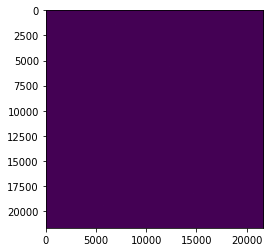

In [8]:
import matplotlib.pyplot as plt
plt.imshow(conn_m)

In [9]:
np.save('conn_drosophila.npy',conn_m)